# Projet Machine Learning: Dis-moi qui tu es, je te dirais ce que tu écoutes.

Dans un premier temps, nous allons préparer nos données ensuite nous essaierons de mettre en place plusieurs méthode de Machine Learning adaptées à la problématique du multi-label.

## Predicting multi-target


### Différence entre Multi-label classification et multi-class classification

#### Classification multi-task
inclue Multi-label classification et Multi-Class classification.
Cherche a améliorer les performance en effectuant les tâches multiples simultanément.

#### Multi-class classification
La classification multiclass ou multinomial est un problème de classification des instances en 3 classes ou plus.
Tandis que certains algorithmes de classification permettent naturellement d'utiliser d'avantage que deux classes, d'autres sont par nature des algorithms binaires. Ces derniers peuvent cependant être utilisé comme des classifieurs multinomiaux selon certaines méthodes.
La classification multiclass ne doit pas être confondu avec la classification multi-label où plusieurs labels sont prédit pour chaque objet.

#### Classification binaire
Classificiation binaire ou binomiale est une tâche de classification des élément d'un ensemble donné en deux groupes (prédisant dans quel groupe un objet appartient) sur la base d'une règle de classification. 

#### Multi-label learning:
La classificaition multi-label et son problème associé de classification à sortie multiple sont des variantes des problèmes de classification où plusieurs labels peuvent être assignés à chaque instance.
la classification Multi-label est une généralisation de la classification multi-class qui est un probleme avec un seul label de catégoriser les instances entre plus de deux ensembles.

En multi-label, il n'y a pas de containtes sur la quantité de classes auxuquels l'instance peut être assignée.

La classification multi-label est un problème de trouver un modèle qui va relier l'entrée x à un vecteur binaire y (assigné une valeur 0 ou 1 pour chaque élément (label) dans y)


le multi-label learning peut être divisé en trois catégories:
 * algorithm adaptation : Les méthodes multi-label qui adaptent, étendent et personnalisent des algorithmes de machine learning déjà existant afin qu'ils puissent gérer les problèmes de multi-label sans avoir recours aux méthodes de problem transformation.
 * problem transformation : Les méthodes de problem transformation sont des méthodes d'apprentissages multi-label qui tranforment le problème de multi-label en un ou plusieurs problèmes de classification ou de régression à un seul label.
 * ensemble classification : Les méthodes ensemblistes pour l'apprentissage multi-label sont développées en s'appuyant les méthodes d'alogrithm adapatation et les problem transformations.


## Reference

https://en.wikipedia.org/wiki/Multi-label_classification

Package pour le multi-label:  
http://scikit.ml/api/classify.html

https://www.slideshare.net/cscpconf/comparative-evaluation-of-four-multilabel-classification-algorithms-in-classifying-learning-objects

https://stackoverflow.com/questions/37858697/scikit-learn-multi-label-classification

http://kt.ijs.si/DragiKocev/wikipage/lib/exe/fetch.php?media=2012pr_ml_comparison.pdf

https://stackoverflow.com/questions/44107236/example-of-multi-label-multi-classmulti-output-randomforest-nearest-neighbo

https://stackoverflow.com/questions/37858697/scikit-learn-multi-label-classification

Une proposition d'implémentation de BP-MLL:  
https://github.com/vanHavel/bp-mll-tensorflow

In [1]:
import pandas as pd
import numpy as np
import skmultilearn

from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.problem_transform import BinaryRelevance

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib

## Préparer les données

On charge les données en séparant nos target (les musiques) et les différentes colonnes par type.
Nous retirons si la personne aime ou non la musique de manière général car ses résultats faussait le résultat général.
Nous retirons également toutes les données non renseignées.

In [2]:
# load datas
donnees = pd.read_csv("../Source/responses.csv", ",")

cols_target = ['Slow songs or fast songs','Dance','Folk','Country','Classical music','Musical','Pop','Rock', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance', 'Opera']
cols_movies = ['Movies', 'Horror','Thriller','Comedy','Romantic', 'Sci-fi','War','Fantasy/Fairy tales','Animated','Documentary','Western','Action']
cols_hobbies = ['Cars','Art exhibitions','Religion','Countryside, outdoors','Dancing','Musical instruments','Writing','Passive sport','Active sport','Gardening','Celebrities','Shopping','Science and technology','Theatre','Fun with friends', 'Adrenaline sports','Pets'
]
cols_interest = ['History','Psychology','Politics','Mathematics','Physics','Internet','PC','Economy Management', 'Biology', 'Chemistry','Reading','Geography','Foreign languages','Medicine','Law'
]
cols_phobias = ['Flying','Storm','Darkness','Heights','Spiders','Snakes','Rats','Ageing','Dangerous dogs','Fear of public speaking'
]
cols_personnality = ['Daily events','Prioritising workload','Writing notes','Workaholism','Thinking ahead','Final judgement','Reliability','Keeping promises','Loss of interest','Friends versus money','Funniness','Fake','Criminal damage','Decision making','Elections','Self-criticism','Judgment calls','Hypochondria','Empathy','Eating to survive','Giving','Compassion to animals','Borrowed stuff','Loneliness','Cheating in school','Health','Changing the past','God','Dreams','Charity',"Number of friends","Waiting","New environment","Mood swings","Appearence and gestures","Socializing","Achievements","Responding to a serious letter","Children","Assertiveness","Getting angry","Knowing the right people","Public speaking","Unpopularity","Life struggles","Happiness in life","Energy levels","Small - big dogs","Personality","Finding lost valuables","Getting up","Interests or hobbies","Parents' advice","Questionnaires or polls"
]
cols_spending = ["Finances","Shopping centres","Branded clothing","Entertainment spending","Spending on looks","Spending on gadgets","Spending on healthy eating"]

donnees = donnees.dropna(axis=0, how='any')

target = donnees[cols_target]

carac = donnees.drop(axis =1,labels=cols_target)


On manipule les données afin de nous assurer d'avoir le format désiré: retirer les données catégorielles pour ne travailler que sur des données entières.
De plus, nous retirons les 4 colonnes qui ne seront pas binarisables aisément (Age, Height, Weight et Number of siblings).


In [3]:

# On sépare les différents type de données (int, float et object(catégorical))
carac_int = carac.select_dtypes(include=['int'])
carac_object = carac.select_dtypes(include=['object'])
carac_float = carac.select_dtypes(include=['float'])


# En observant le dataset, on peut modifier tous les float en int.
carac_int = carac.select_dtypes(exclude=[object])
carac_int = carac_int.astype('int')
target = target.astype('int')


# On sépare Age, Taille, Poids et nombre de frères et soeurs qui ne sont pas sur l'échelle 1-5 de préférence.
cols = ['Age', 'Height', 'Weight', 'Number of siblings']
test= ['Age']
carac_int1 = carac_int.drop(axis=1, labels=cols)
carac_int2 = carac_int[cols]


# On sépare chaque caractéristiques en plusieurs sous-groupe pour permettre une étude plus pertinente.
carac_movies= carac_int[cols_movies]
carac_hobbies = carac_int[cols_hobbies]
carac_interests = carac_int[cols_interest]
carac_phobias = carac_int[cols_phobias]
carac_personnality = carac_int[cols_personnality]
carac_spending = carac_int[cols_spending]


On calcule les PCAs des différents jeux de données sur lesquels nous essaierons de faire nos prédictions et ont rajoutes le nombre de PCAs qui permettent d'avoir > 0,75 

In [4]:

# Calcule des PCAs
pca = PCA()

pca = pca.fit(carac_int1)
print(pca.explained_variance_ratio_.cumsum())


pca = PCA(n_components = 72)
carac_int_PCA = pca.fit_transform(carac_int1)

carac_int_concat = np.hstack([carac_int1, carac_int_PCA])
carac_int_concat = pd.DataFrame(carac_int_concat)

pca = PCA()
pca = pca.fit(carac_int2)
print(pca.explained_variance_ratio_.cumsum())

# On constate qe ce sont les variables que l'on ne peut pas binarisées qui offrent le plus d'informations.
# En effet, l'age serait un élément déterminant de ce que montre le PCA.

# Movies
pca = PCA()
print("\nMovies:")
pca = pca.fit(carac_movies)
print(pca.explained_variance_ratio_.cumsum())

pca = PCA(n_components = 6)
carac_movies_PCA = pca.fit_transform(carac_movies)

carac_movies_concat = np.hstack([carac_movies, carac_movies_PCA])
carac_movies_concat = pd.DataFrame(carac_movies_concat)

# Hobbies
pca = PCA()
print("\nHobbies:")
pca = pca.fit(carac_hobbies)
print(pca.explained_variance_ratio_.cumsum())

pca = PCA(n_components = 4)
carac_hobbies_PCA = pca.fit_transform(carac_hobbies)

carac_hobbies_concat = np.hstack([carac_hobbies, carac_hobbies_PCA])
carac_hobbies_concat = pd.DataFrame(carac_hobbies_concat)

# Interests
pca = PCA()
print("\nInterests:")
pca = pca.fit(carac_interests)
print(pca.explained_variance_ratio_.cumsum())

pca = PCA(n_components = 7)
carac_interests_PCA = pca.fit_transform(carac_interests)

carac_interests_concat = np.hstack([carac_interests, carac_interests_PCA])
carac_interests_concat = pd.DataFrame(carac_interests_concat)

# Phobias
pca = PCA()
print("\nPhobias:")
pca = pca.fit(carac_phobias)
print(pca.explained_variance_ratio_.cumsum())

pca = PCA(n_components = 6)
carac_phobias_PCA = pca.fit_transform(carac_phobias)

carac_phobias_concat = np.hstack([carac_phobias, carac_phobias_PCA])
carac_phobias_concat = pd.DataFrame(carac_phobias_concat)

# Personnality
pca = PCA()
print("\nPersonnality:")
pca = pca.fit(carac_personnality)
print(pca.explained_variance_ratio_.cumsum())

pca = PCA(n_components = 27)
carac_personnality_PCA = pca.fit_transform(carac_personnality)

carac_personnality_concat = np.hstack([carac_personnality, carac_personnality_PCA])
carac_personnality_concat = pd.DataFrame(carac_personnality_concat)

# Spending
pca = PCA()
print("\n Spending:")
pca = pca.fit(carac_spending)
print(pca.explained_variance_ratio_.cumsum())

pca = PCA(n_components = 4)
carac_spending_PCA = pca.fit_transform(carac_spending)

carac_spending_concat = np.hstack([carac_spending, carac_spending_PCA])
carac_spending_concat = pd.DataFrame(carac_spending_concat)

[ 0.07702285  0.1346205   0.18346144  0.21577729  0.24603135  0.27536953
  0.29918212  0.32139112  0.34197777  0.361225    0.37959072  0.39651953
  0.41234958  0.42788469  0.44266961  0.45667121  0.4701976   0.48342323
  0.49604902  0.50834175  0.52022228  0.53165958  0.54280251  0.55360183
  0.56408227  0.57433981  0.58451705  0.59439434  0.60412048  0.61362655
  0.62301956  0.63223381  0.64115605  0.64983524  0.65828541  0.66664794
  0.67468926  0.68259121  0.69037374  0.69793665  0.70535872  0.71263615
  0.71982797  0.72686911  0.73381304  0.74058165  0.74725717  0.7538495
  0.76028377  0.76661633  0.77287871  0.779074    0.78522928  0.79128329
  0.79713454  0.80277737  0.80839151  0.81396379  0.81940915  0.8247564
  0.83000016  0.83514413  0.84017281  0.84511296  0.84997709  0.85478995
  0.85953213  0.86406418  0.86851794  0.87281086  0.87707357  0.88126694
  0.88539806  0.88948051  0.8934925   0.89741682  0.90131172  0.90512102
  0.90883313  0.91246603  0.91597759  0.91938658  0.9

### binariser les données

On binarise afin de pouvoir utiliser plus aisément les différents algorithmes de multi-label.

Repartition:
 Slow songs or fast songs : 


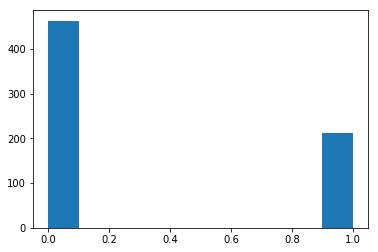

 Dance : 


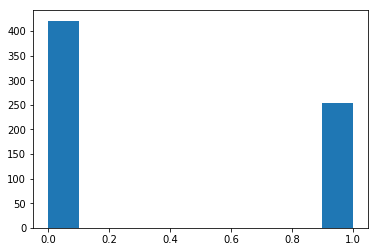

 Folk : 


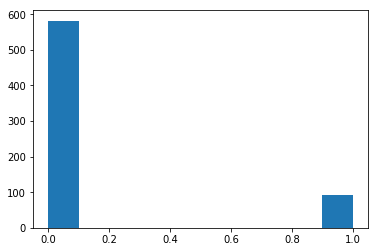

 Country : 


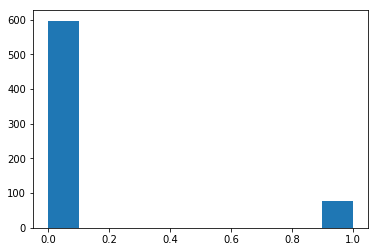

 Classical music : 


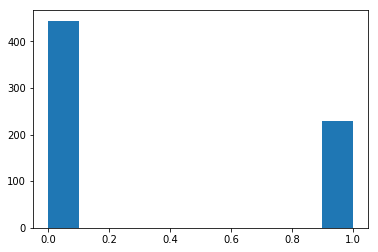

 Musical : 


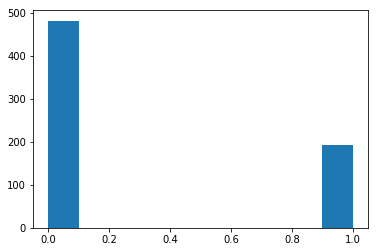

 Pop : 


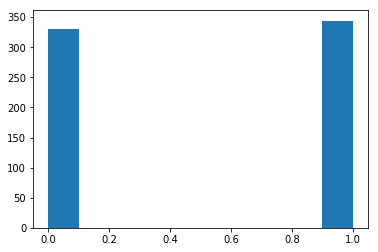

 Rock : 


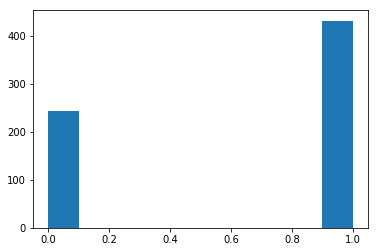

 Metal or Hardrock : 


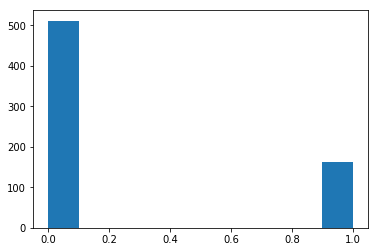

 Punk : 


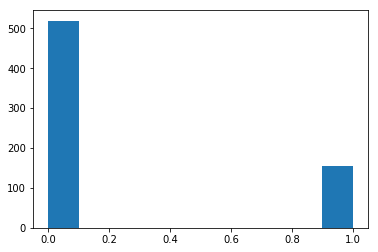

 Hiphop, Rap : 


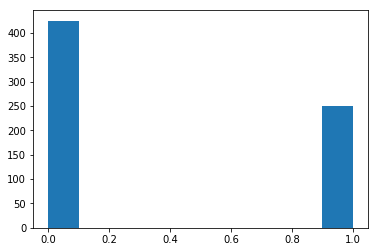

 Reggae, Ska : 


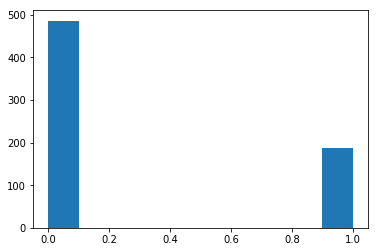

 Swing, Jazz : 


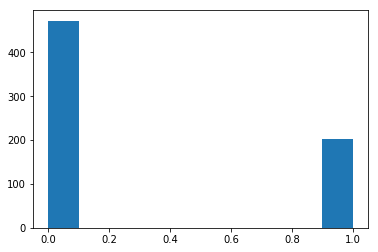

 Rock n roll : 


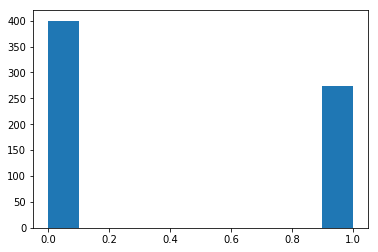

 Alternative : 


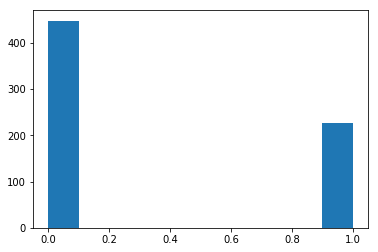

 Latino : 


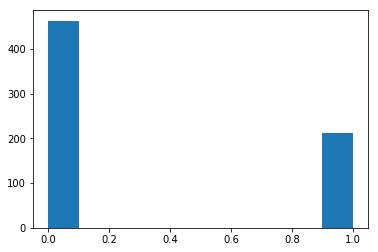

 Techno, Trance : 


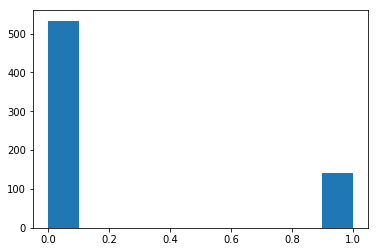

 Opera : 


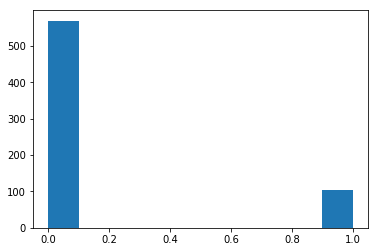

In [77]:
# Dans un premier temps, nous n'allons travailler que sur les données ayant une échelle de 1 à 5.
#Nous laissons de côtés les données catégorical ou avec trop de variance comme le poid ou le nombre de frères et soeurs.

target_bin = target.replace([3,2,1], 0)
target_bin = target_bin.replace([4,5], 1)

carac_int_bin = carac_int_concat.replace([3,2,1], 0)
carac_int_bin = carac_int_bin.replace([4,5], 1)

carac_movies_bin = carac_movies_concat.replace([3,2,1], 0)
carac_movies_bin = carac_movies_bin.replace([4,5], 1)

carac_hobbies_bin = carac_hobbies_concat.replace([3,2,1], 0)
carac_hobbies_bin = carac_hobbies_bin.replace([4,5], 1)

carac_interests_bin = carac_interests_concat.replace([3,2,1], 0)
carac_interests_bin = carac_interests_bin.replace([4,5], 1)

carac_phobias_bin = carac_phobias_concat.replace([3,2,1], 0)
carac_phobias_bin = carac_phobias_bin.replace([4,5], 1)

carac_personnality_bin = carac_personnality_concat.replace([3,2,1], 0)
carac_personnality_bin = carac_personnality_bin.replace([4,5], 1)

carac_spending_bin = carac_spending_concat.replace([3,2,1], 0)
carac_spending_bin = carac_spending_bin.replace([4,5], 1)

def afficheHist(nom):
    print(" {} : ".format(nom))
    plt.hist(target_bin[nom].T)
    plt.show()


print("Repartition:")

for music in target_bin:
    afficheHist(music)


# Transformation Method

## LabelPowerset

In [58]:

def testLabelPowerset(carac, classifier):
    x_train , x_test, y_train, y_test = train_test_split(carac, target_bin ,test_size=0.3, random_state = 42)

    # initialize Label Powerset multi-label classifier
    # with a gaussian naive bayes base classifier
    classifier = LabelPowerset(classifier)

    # train
    classifier.fit(x_train, y_train)

    # predict
    predictions = classifier.predict(x_test)

    print(f1_score(y_test, predictions, average='macro'))
    print(f1_score(y_test, predictions, average='micro')) 
    print(f1_score(y_test, predictions, average='weighted'))
    print(f1_score(y_test, predictions, average=None))

In [59]:

print("\n Ensemble des donnees - RandomForest :")
testLabelPowerset(carac_int_bin, RandomForestClassifier())

print("\n Ensemble des donnees - GaussianNB :")
testLabelPowerset(carac_int_bin, GaussianNB())

print("\n Ensemble des donnees - KNeighbors :")
testLabelPowerset(carac_int_bin, KNeighborsClassifier())

print("\n Ensemble des donnees - AdaBoost :")
testLabelPowerset(carac_int_bin, AdaBoostClassifier())


 Ensemble des donnees - RandomForest :
0.298241859669
0.354156881165
0.347422993486
[ 0.26356589  0.45        0.12765957  0.1025641   0.34710744  0.21359223
  0.51612903  0.63492063  0.23913043  0.26190476  0.43421053  0.25688073
  0.28828829  0.36024845  0.24137931  0.30769231  0.2247191   0.09836066]

 Ensemble des donnees - GaussianNB :


/home/kylaste/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0356099794795
0.0588730025231
0.0514579917611
[ 0.          0.07228916  0.          0.          0.          0.
  0.07619048  0.23684211  0.          0.          0.02631579  0.          0.
  0.          0.14893617  0.03278689  0.04761905  0.        ]

 Ensemble des donnees - KNeighbors :
0.345731508359
0.397595931577
0.390643351149
[ 0.31034483  0.45283019  0.19047619  0.          0.26923077  0.43809524
  0.54187192  0.651341    0.36363636  0.33628319  0.26771654  0.27659574
  0.26923077  0.42424242  0.47058824  0.42735043  0.21333333  0.32      ]

 Ensemble des donnees - AdaBoost :
0.0251066246332
0.0262697022767
0.0261082147394
[ 0.03448276  0.05063291  0.06666667  0.          0.05633803  0.          0.
  0.0483871   0.03921569  0.04347826  0.          0.          0.03448276
  0.04597701  0.          0.03225806  0.          0.        ]


/home/kylaste/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [60]:
# Movies
print("\n Movies - RandomForest:")
testLabelPowerset(carac_movies_bin, RandomForestClassifier())

# Hobbies
print("\n Hobbies - RandomForest:")
testLabelPowerset(carac_hobbies_bin, RandomForestClassifier())

# Interests
print("\n Interests - RandomForest:")
testLabelPowerset(carac_interests_bin, RandomForestClassifier())

# Phobias
print("\n Phobias - RandomForest:")
testLabelPowerset(carac_phobias_bin, RandomForestClassifier())

# Personnality
print("\n Personnality - RandomForest:")
testLabelPowerset(carac_personnality_bin, RandomForestClassifier())

# Spending
print("\n Spending - RandomForest:")
testLabelPowerset(carac_spending_bin, RandomForestClassifier())




 Movies - RandomForest:
0.327081507587
0.374437443744
0.370648049701
[ 0.28828829  0.39751553  0.10714286  0.22727273  0.3125      0.35087719
  0.51886792  0.640625    0.34951456  0.28        0.30656934  0.26315789
  0.21666667  0.52631579  0.34375     0.30252101  0.25        0.20588235]

 Hobbies - RandomForest:
0.334540708679
0.386013986014
0.379824389633
[ 0.31343284  0.42384106  0.28070175  0.09302326  0.38333333  0.28571429
  0.56435644  0.65338645  0.32075472  0.3030303   0.46575342  0.25490196
  0.28865979  0.33557047  0.42962963  0.26923077  0.19512195  0.16129032]

 Interests - RandomForest:
0.339682831795
0.383244206774
0.380970624277
[ 0.34482759  0.39506173  0.15873016  0.11764706  0.40944882  0.36507937
  0.48        0.64122137  0.33333333  0.29126214  0.27941176  0.26548673
  0.36363636  0.44186047  0.3875969   0.35483871  0.27272727  0.21212121]

 Phobias - RandomForest:
0.299145380817
0.352206865805
0.348491641676
[ 0.25862069  0.37837838  0.03076923  0.23728814  0.264

## Binary Relevance

In [40]:
def testBinaryRelevance(carac, classifier):
    x_train , x_test, y_train, y_test = train_test_split(carac, target_bin ,test_size=0.3, random_state = 42)
    
    # initialize Binary Relevance multi-label classifier
    # with an SVM classifier
    # SVM in scikit only supports the X matrix in sparse representation

    classifier = BinaryRelevance(classifier = classifier, require_dense = [False, True])

    # train
    classifier.fit(x_train, y_train)

    # predict
    predictions = classifier.predict(x_test)

    print(f1_score(y_test, predictions, average='macro'))
    print(f1_score(y_test, predictions, average='micro')) 
    print(f1_score(y_test, predictions, average='weighted'))
    print(f1_score(y_test, predictions, average=None))

In [61]:
# Test SVC

print("\n Ensemble de donnees - SVC :")
testBinaryRelevance(carac_int_bin, SVC())

# Test RandomForest
print("\n Ensemble de donnees - RandomForest :")
testBinaryRelevance(carac_int_bin, RandomForestClassifier())

# Test KNeighbors
print("\n Ensemble de donnees - KNeighbors :")
testBinaryRelevance(carac_int_bin,KNeighborsClassifier())

# Test AdaBoost
print("\n Ensemble de donnees - AdaBoost :")
testBinaryRelevance(carac_int_bin,AdaBoostClassifier())



 Ensemble de donnees - SVC :


/home/kylaste/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.253905171855
0.405797101449
0.333208918389
[ 0.21538462  0.39285714  0.          0.          0.48648649  0.08571429
  0.63681592  0.74918567  0.21428571  0.          0.43243243  0.
  0.24691358  0.42748092  0.40425532  0.27848101  0.          0.        ]

 Ensemble de donnees - RandomForest :


/home/kylaste/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.203806950888
0.320400500626
0.269110155357
[ 0.23684211  0.27586207  0.          0.          0.22222222  0.10958904
  0.54736842  0.68656716  0.0754717   0.12        0.32727273  0.02857143
  0.14492754  0.32520325  0.23529412  0.28571429  0.04761905  0.        ]

 Ensemble de donnees - KNeighbors :
0.294740843952
0.392564242756
0.35533727071
[ 0.29333333  0.35384615  0.21621622  0.          0.23404255  0.28571429
  0.61032864  0.72        0.17142857  0.22857143  0.37209302  0.18181818
  0.31111111  0.4028777   0.46956522  0.28846154  0.04347826  0.12244898]

 Ensemble de donnees - AdaBoost :
0.362618126495
0.433606953163
0.417936926731
[ 0.40384615  0.51948052  0.22222222  0.          0.44615385  0.36842105
  0.57281553  0.67657993  0.27848101  0.2195122   0.49295775  0.28571429
  0.33962264  0.4516129   0.47933884  0.33027523  0.22580645  0.21428571]


In [62]:
# Movies
print("\n Movies - KNeighbors:")
testBinaryRelevance(carac_movies_bin, KNeighborsClassifier())

# Hobbies
print("\n Hobbies - KNeighbors:")
testBinaryRelevance(carac_hobbies_bin, KNeighborsClassifier())

# Interests
print("\n Interests - KNeighbors:")
testBinaryRelevance(carac_interests_bin, KNeighborsClassifier())

# Phobias
print("\n Phobias - KNeighbors:")
testBinaryRelevance(carac_phobias_bin, KNeighborsClassifier())

# Personnality
print("\n Personnality - KNeighbors:")
testBinaryRelevance(carac_personnality_bin, KNeighborsClassifier())

# Spending
print("\n Spending - KNeighbors:")
testBinaryRelevance(carac_spending_bin, KNeighborsClassifier())

# Movies
print("\n Movies - AdaBoost:")
testBinaryRelevance(carac_movies_bin, AdaBoostClassifier())

# Hobbies
print("\n Hobbies - AdaBoost:")
testBinaryRelevance(carac_hobbies_bin, AdaBoostClassifier())

# Interests
print("\n Interests - AdaBoost:")
testBinaryRelevance(carac_interests_bin, AdaBoostClassifier())

# Phobias
print("\n Phobias - AdaBoost:")
testBinaryRelevance(carac_phobias_bin, AdaBoostClassifier())

# Personnality
print("\n Personnality - AdaBoost:")
testBinaryRelevance(carac_personnality_bin, AdaBoostClassifier())

# Spending
print("\n Spending - AdaBoost:")
testBinaryRelevance(carac_spending_bin, AdaBoostClassifier())


 Movies - KNeighbors:
0.287347837931
0.372967479675
0.346744075406
[ 0.25882353  0.32653061  0.11764706  0.          0.352       0.34343434
  0.5470852   0.68382353  0.21333333  0.23880597  0.4         0.19148936
  0.11764706  0.44578313  0.34862385  0.32692308  0.10344828  0.15686275]

 Hobbies - KNeighbors:
0.35796197119
0.439664218258
0.41501716716
[ 0.26262626  0.42647059  0.22222222  0.          0.46017699  0.34482759
  0.58031088  0.70036101  0.35294118  0.31428571  0.47058824  0.24175824
  0.36734694  0.49673203  0.48780488  0.38834951  0.19607843  0.13043478]

 Interests - KNeighbors:
0.282070563891
0.377812663527
0.345406916579
[ 0.2020202   0.33082707  0.0625      0.06896552  0.41269841  0.24489796
  0.54187192  0.72401434  0.09230769  0.13333333  0.25396825  0.32608696
  0.32323232  0.4         0.44247788  0.34862385  0.125       0.04444444]

 Phobias - KNeighbors:


/home/kylaste/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.221636217246
0.325581395349
0.285850677466
[ 0.25263158  0.22222222  0.          0.          0.20689655  0.12658228
  0.51741294  0.70545455  0.16        0.13793103  0.19298246  0.14634146
  0.22727273  0.41958042  0.39655172  0.23913043  0.03846154  0.        ]

 Personnality - KNeighbors:
0.256273563354
0.353733857383
0.316381536492
[ 0.25714286  0.4         0.15789474  0.          0.22680412  0.20689655
  0.57276995  0.66415094  0.15873016  0.13559322  0.3442623   0.14814815
  0.20454545  0.39130435  0.3047619   0.29357798  0.          0.14634146]

 Spending - KNeighbors:
0.25932117939
0.359002169197
0.324734595474
[ 0.24074074  0.36065574  0.          0.          0.31775701  0.18181818
  0.54368932  0.67391304  0.22222222  0.13559322  0.4         0.15730337
  0.27272727  0.42553191  0.34951456  0.25742574  0.04        0.08888889]

 Movies - AdaBoost:
0.305709973167
0.388860237236
0.363569912078
[ 0.31460674  0.44897959  0.06060606  0.          0.31496063  0.31372549
  0.57281553 

## Chain Classifier

In [63]:
from skmultilearn.problem_transform import ClassifierChain

def testChainClassifier(carac, classifier):
    
    x_train , x_test, y_train, y_test = train_test_split(carac, target_bin ,test_size=0.3, random_state=42)
    classifier = ClassifierChain(classifier = classifier, require_dense = [False, True])

    # train
    classifier.fit(x_train, y_train)

    # predict
    predictions = classifier.predict(x_test)

    print(f1_score(y_test, predictions, average='macro'))
    print(f1_score(y_test, predictions, average='micro')) 
    print(f1_score(y_test, predictions, average='weighted'))
    print(f1_score(y_test, predictions, average=None))

In [64]:

print("\n Ensemble de donnees - RandomForest:")
testChainClassifier(carac_int_bin, RandomForestClassifier())

print("\n Ensemble de donnees - KNeighbors:")
testChainClassifier(carac_int_bin, KNeighborsClassifier())

print("\n Ensemble de donnees - AdaBoost:")
testChainClassifier(carac_int_bin, AdaBoostClassifier())


 Ensemble de donnees - RandomForest:


/home/kylaste/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.199125561644
0.310567010309
0.26086587523
[ 0.17910448  0.24299065  0.06666667  0.          0.32183908  0.02631579
  0.60301508  0.62015504  0.07407407  0.          0.33333333  0.05882353
  0.18181818  0.25        0.30232558  0.23684211  0.08695652  0.        ]

 Ensemble de donnees - KNeighbors:
0.305165947484
0.400660429279
0.364382050289
[ 0.29333333  0.35384615  0.22222222  0.          0.23655914  0.20689655
  0.61971831  0.72527473  0.17391304  0.23188406  0.3875969   0.275
  0.33333333  0.4         0.47272727  0.31372549  0.08695652  0.16      ]

 Ensemble de donnees - AdaBoost:
0.380390309457
0.445959104187
0.431059395873
[ 0.40384615  0.51948052  0.22222222  0.05714286  0.44628099  0.32142857
  0.54726368  0.71641791  0.35714286  0.35714286  0.52        0.31481481
  0.33684211  0.4084507   0.47154472  0.4         0.16129032  0.28571429]


In [65]:
# Movies
print("\n Movies - KNeighbors:")
testChainClassifier(carac_movies_bin, KNeighborsClassifier())

# Hobbies
print("\n Hobbies - KNeighbors:")
testChainClassifier(carac_hobbies_bin, KNeighborsClassifier())

# Interests
print("\n Interests - KNeighbors:")
testChainClassifier(carac_interests_bin, KNeighborsClassifier())

# Phobias
print("\n Phobias - KNeighbors:")
testChainClassifier(carac_phobias_bin, KNeighborsClassifier())

# Personnality
print("\n Personnality - KNeighbors:")
testChainClassifier(carac_personnality_bin, KNeighborsClassifier())

# Spending
print("\n Spending - KNeighbors:")
testChainClassifier(carac_spending_bin, KNeighborsClassifier())
# Movies
print("\n Movies - AdaBoost:")
testChainClassifier(carac_movies_bin, AdaBoostClassifier())

# Hobbies
print("\n Hobbies - AdaBoost:")
testChainClassifier(carac_hobbies_bin, AdaBoostClassifier())

# Interests
print("\n Interests - AdaBoost:")
testChainClassifier(carac_interests_bin, AdaBoostClassifier())

# Phobias
print("\n Phobias - AdaBoost:")
testChainClassifier(carac_phobias_bin, AdaBoostClassifier())

# Personnality
print("\n Personnality - AdaBoost:")
testChainClassifier(carac_personnality_bin, AdaBoostClassifier())

# Spending
print("\n Spending - AdaBoost:")
testChainClassifier(carac_spending_bin, AdaBoostClassifier())


 Movies - KNeighbors:
0.279142618545
0.368772470467
0.33973957179
[ 0.25882353  0.27142857  0.125       0.          0.32786885  0.27956989
  0.52093023  0.71126761  0.27848101  0.17391304  0.37878788  0.20930233
  0.1682243   0.46753247  0.3539823   0.31067961  0.10714286  0.08163265]

 Hobbies - KNeighbors:
0.353661125635
0.433646812957
0.408645050046
[ 0.26262626  0.4         0.18181818  0.          0.46956522  0.3255814
  0.56122449  0.69565217  0.42553191  0.39473684  0.47692308  0.26966292
  0.34782609  0.48        0.45901639  0.28865979  0.15686275  0.17021277]

 Interests - KNeighbors:
0.278792015291
0.367498672331
0.338560203196
[ 0.2020202   0.32061069  0.0625      0.06896552  0.38655462  0.23655914
  0.5257732   0.71684588  0.16901408  0.16129032  0.27906977  0.29213483
  0.28888889  0.40789474  0.4173913   0.23529412  0.12244898  0.125     ]

 Phobias - KNeighbors:
0.22551829278
0.316628701595
0.282426587889
[ 0.25263158  0.21487603  0.          0.07692308  0.25        0.10

# Algorithm Adaptation
## MLKnn

In [66]:
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import GridSearchCV
def testAdaptKNN(carac, classifier):
    x_train , x_test, y_train, y_test = train_test_split(carac, target_bin ,test_size=0.3, random_state = 42)
    x_train = x_train.values
    y_train = y_train.values

    classifier = classifier

    # train
    classifier.fit(x_train, y_train)

    # predict
    predictions = classifier.predict(x_test)

    print(f1_score(y_test, predictions, average='macro'))
    print(f1_score(y_test, predictions, average='micro')) 
    print(f1_score(y_test, predictions, average='weighted'))
    print(f1_score(y_test, predictions, average=None))

In [67]:
print("\n  Ensemble de données - MLKNeighbors:")
testAdaptKNN(carac_int_bin, MLkNN(k=4))

print("\n Movies - MLKNeighbors:")
testAdaptKNN(carac_movies_bin, MLkNN(k=4))

print("\n Interests - MLKNeighbors:")
testAdaptKNN(carac_interests_bin, MLkNN(k=4))

print("\n Hobbies - MLKNeighbors:")
testAdaptKNN(carac_hobbies_bin, MLkNN(k=4))

print("\n Personnality - MLKNeighbors:")
testAdaptKNN(carac_personnality_bin, MLkNN(k=4))

print("\n Phobias - MLKNeighbors:")
testAdaptKNN(carac_phobias_bin, MLkNN(k=4))

print("\n Spending - MLKNeighbors:")
testAdaptKNN(carac_spending_bin, MLkNN(k=4))


  Ensemble de données - MLKNeighbors:
0.354307087306
0.457965629354
0.42169663073
[ 0.4         0.47852761  0.11764706  0.          0.36521739  0.43333333
  0.65560166  0.74666667  0.3655914   0.1754386   0.47852761  0.35514019
  0.39316239  0.44318182  0.49315068  0.20253165  0.19047619  0.08333333]

 Movies - MLKNeighbors:


/home/kylaste/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.316548162876
0.40442192538
0.37620939788
[ 0.3875969   0.46994536  0.          0.          0.42767296  0.41860465
  0.4673913   0.60251046  0.35051546  0.18518519  0.44186047  0.34645669
  0.09756098  0.53266332  0.29885057  0.42105263  0.25        0.        ]

 Interests - MLKNeighbors:
0.246058027446
0.354255319149
0.306226684492
[ 0.10526316  0.20560748  0.          0.          0.26530612  0.33333333
  0.60330579  0.65306122  0.22727273  0.14545455  0.10416667  0.19512195
  0.22222222  0.49246231  0.45070423  0.09756098  0.28169014  0.04651163]

 Hobbies - MLKNeighbors:
0.34435525746
0.415075376884
0.395339818108
[ 0.35820896  0.27826087  0.06451613  0.          0.47482014  0.41818182
  0.48809524  0.59482759  0.25714286  0.2         0.58278146  0.21428571
  0.368       0.52173913  0.44230769  0.42748092  0.23188406  0.27586207]

 Personnality - MLKNeighbors:
0.364379662713
0.454348766768
0.429233126745
[ 0.41121495  0.48618785  0.06060606  0.07407407  0.32258065  0.37398374
  0.6

# Conclusion

Il reste encore de nombreuses approches à tester pour le multi-learning, en particuliers les réseaux de neurones adapté (comme le BP-MLL ou Haram) mais nous avons rencontré des difficultés leur de leur mises en place.

Les méthodes ensemblistes comme RAkEL sont aussi une approche qu'il reste à tester.

Les résultats sont peu probant. Les deux méthodes qui semblent donner le plus de résultat sont le KNN adapté au multi-label et la méthode AdaBoost utilisée avec la méthode de transformation du ChainClassifier.